<Axes: ylabel='Count'>

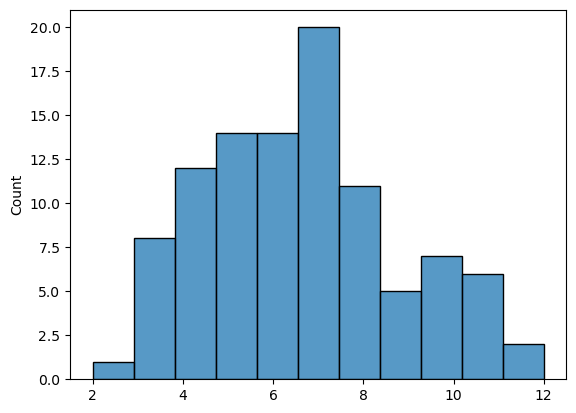

In [36]:
import random

from scipy.stats import nbinom
from seaborn import histplot
from statsmodels.graphics.tukeyplot import results
from transformers.models.deprecated.deta.modeling_deta import dice_loss

results = []
my_list = ([2] * 1 + [3] * 2 +
           [4] * 3 + [5] * 4 + 
           [6] * 5 + [7] * 6 + 
           [8] * 5 + [9] * 4 + 
           [10] * 3 + [11] * 2 + 
           [12] * 1)

for i in range(100):
    n = random.choice(my_list)
    results.append(n)

histplot(results, bins = 11)

In [34]:
from dataclasses import dataclass
from typing import Dict, List, Tuple
import random

@dataclass
class Tile:
    resource: str
    number: int
    probability: float
    
class CatanBoard:
    def __init__(self):
        # Probability distribution for 2d6
        self.dice_probabilities = {
            2: 1/36, 3: 2/36, 4: 3/36, 5: 4/36, 6: 5/36,
            7: 6/36, 8: 5/36, 9: 4/36, 10: 3/36, 11: 2/36, 12: 1/36
        }
        
        # Standard resource distribution
        self.resources = ['wood', 'brick', 'ore', 'wheat', 'sheep', 'desert']
        self.tiles: List[Tile] = []
        
    def initialize_random_board(self):
        # Create 19 tiles (including one desert)
        numbers = [2,3,3,4,4,5,5,6,6,8,8,9,9,10,10,11,11,12]
        random.shuffle(numbers)
        
        resources_dist = ['wood']*4 + ['brick']*3 + ['ore']*3 + \
                        ['wheat']*4 + ['sheep']*4 + ['desert']
        random.shuffle(resources_dist)
        
        self.tiles = []
        num_idx = 0
        for resource in resources_dist:
            if resource == 'desert':
                number = 7  # Robber starts here
                prob = 0
            else:
                number = numbers[num_idx]
                prob = self.dice_probabilities[number]
                num_idx += 1
            self.tiles.append(Tile(resource, number, prob))
            
    def calculate_intersection_value(self, tile_indices: List[int]) -> float:
        """Calculate the probability of getting any resource from an intersection"""
        total_prob = 0
        for idx in tile_indices:
            if idx < len(self.tiles):
                total_prob += self.tiles[idx].probability
        return total_prob
    
    def find_best_settlement_locations(self) -> List[Tuple[List[int], float]]:
        """Find the intersections with highest probability of producing resources"""
        # This is a simplified version - in reality, you'd need to check valid placement rules
        intersections = []
        # Example: checking 3-tile intersections
        for i in range(len(self.tiles)):
            for j in range(i+1, len(self.tiles)):
                for k in range(j+1, len(self.tiles)):
                    value = self.calculate_intersection_value([i,j,k])
                    intersections.append(([i,j,k], value))
        
        return sorted(intersections, key=lambda x: x[1], reverse=True)

## Todo make a record of idealized victory points
## Todo print out a board for the randomized board
## Print out the distribution of resources


# Example usage
board = CatanBoard()
board.initialize_random_board()


# Find best settlement locations
best_locations = board.find_best_settlement_locations()[:5]
for location, value in best_locations:
    print(f"Location {location} has probability {value:.3f}")


TypeError: 'list' object is not callable

In [ ]:
from catanatron import Game, RandomPlayer, Color

# Play a simple 4v4 game
players = [
    RandomPlayer(Color.RED),
    RandomPlayer(Color.BLUE),
    RandomPlayer(Color.WHITE),
    RandomPlayer(Color.ORANGE),
]
game = Game(players)
print(game.play())  # returns winning color

In [46]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Dict

@dataclass
class Space:
# This is used for spaces that fall under non-defined categories, e.g jail, go, etc.
    name: str
    position: int
    result: str
    cost: int
    jail_status: bool
    space_change: int or None

@dataclass
class Road:
# This is used for standard properties
    name: str
    position: int
    cost_to_buy: int
    color_group: str
    mortgage_status: False
    owner: None
    mortgage: int
    unmortgage: int
    rent: int
    one_house: int
    two_house: int
    three_house: int
    four_house: int
    hotel: int

@dataclass
# This is used for the railroads and utilities
class Property:
    name: str
    position: int
    cost_to_buy: int
    group: str
    mortgage_status: False
    owner: None
    mortgage: int
    unmortgage: int
    rent: int
    rent_with_two: int
    rent_with_three: int
    rent_with_four: int
    
@dataclass
# This is used for community chest and chance cards
class Card:
    name: str
    type: str
    text: str
    cost: int
    jail_status: bool
    space_change: int or None

    name: str
    position: int = 0
    money: int = 1500
    properties: List[Property] = None
    mortgaged_properties: List[Property] = None
    total_houses: int = 0
    total_hotels: int = 0
    get_out_of_jail_cards: int = 0
    is_bankrupt: bool = False
    is_jail: bool = False
    
    def __post_init__(self):
        if self.properties is None:
            self.properties = []







class MonopolyBoard:
    def __init__(self):
        self.gameboard = self._initialize_gameboard()

    def _initialize_gameboard(self):
        return {
                0: Space("Go", 0, "Collect $200", 200, False, None),
                1: Road("Mediterranean Avenue", 1, 60, 2, "brown"),
                2: CommunityChest,
                3: Property("Baltic Avenue", 3, 60, 4, "brown"),
                4: Space("IncomeTax", 4, "Pay $200", -200, False, None),
                5: Property("ReadingRailroad", 5, 200, 25, "railroad"),
                6: Road("Oriental Avenue", 1, 60, 2, "brown"),
                7: Road("Mediterranean Avenue", 1, 60, 2, "brown"),
                8: Road("Mediterranean Avenue", 1, 60, 2, "brown"),
                9: Property("Railroad", 4, 200, 25, "railroad"),
                10: Property("Railroad", 4, 200, 25, "railroad")
                # Add more properties here
            }
    
class MonopolyGame:
    def __init__(self, num_players: int):
        self.board = MonopolyBoard()
        self.players = [Player(f"Player_{i}") for i in range(num_players)]
        self.current_player = 0
        self.history = []
        
    def roll_dice(self):
        return random.randint(1, 6) + random.randint(1, 6)
    
    def play_turn(self, player: Player):
        if player.is_bankrupt:
            return
            
        roll = self.roll_dice()
        player.position = (player.position + roll) % 40 # fourty spaces on monopoly board
        
        # Handle landing on property
        if player.position in self.board.properties:
            prop = self.board.properties[player.position]
            if not any(p.position == prop.position for p in player.properties):
                if player.money >= prop.price:
                    player.money -= prop.price
                    player.properties.append(prop)
        
        # Record history
        self.history.append({
            'turn': len(self.history),
            'player': player.name,
            'position': player.position,
            'money': player.money,
            'properties': len(player.properties)
        })
        
def visualize_game(game: MonopolyGame):
    df = pd.DataFrame(game.history)
    
    # Plot money over time
    plt.figure(figsize=(12, 6))
    for player in game.players:
        player_data = df[df['player'] == player.name]
        plt.plot(player_data['turn'], player_data['money'], label=player.name)
    
    plt.title('Player Money Over Time')
    plt.xlabel('Turn')
    plt.ylabel('Money')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Property acquisition summary
    final_properties = df.groupby('player')['properties'].last()
    print("\nFinal Property Count:")
    print(final_properties)


def run_simulation(num_players=4, num_turns=50):
    game = MonopolyGame(num_players)
    
    for _ in range(num_turns):
        for player in game.players:
            game.play_turn(player)
    
    visualize_game(game)
    return game

# Run the simulation
simulation = run_simulation()


SyntaxError: invalid syntax (2757814154.py, line 51)

Rolling two dice 100 times...
The probabilities of landing on a given Monopoly square after 100 rolls
 P(0)=0.02
 P(1)=0.02
 P(2)=0.05
 P(3)=0.06
 P(4)=0.03
 P(5)=0.01
 P(6)=0.01
 P(7)=0.02
 P(8)=0.02
 P(9)=0.01
 P(10)=0.04
 P(11)=0.03
 P(12)=0.04
 P(13)=0.02
 P(14)=0.01
 P(15)=0.02
 P(16)=0.0
 P(17)=0.02
 P(18)=0.01
 P(19)=0.02
 P(20)=0.04
 P(21)=0.04
 P(22)=0.03
 P(23)=0.03
 P(24)=0.01
 P(25)=0.02
 P(26)=0.01
 P(27)=0.04
 P(28)=0.03
 P(29)=0.05
 P(30)=0.01
 P(31)=0.04
 P(32)=0.0
 P(33)=0.06
 P(34)=0.02
 P(35)=0.02
 P(36)=0.04
 P(37)=0.01
 P(38)=0.02
 P(39)=0.02
where P(n) is the probability of landing on the nth Monopoly board square


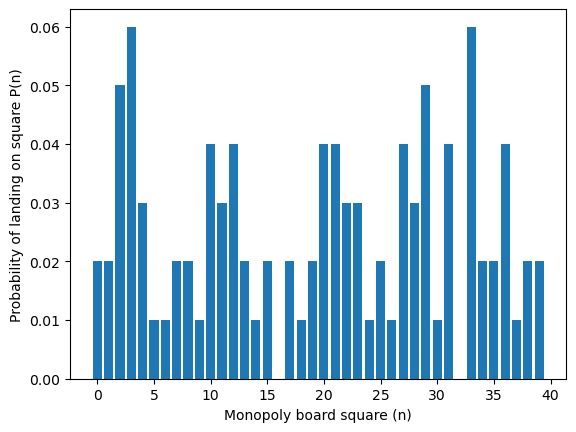

<Axes: ylabel='Count'>

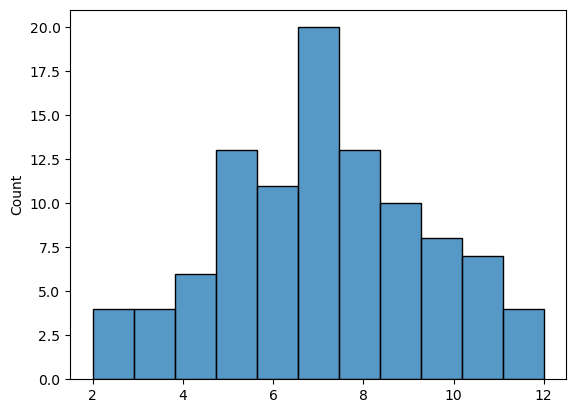

In [45]:
#!/usr/bin/env python3

# Import the random package
import random

# Import the matplotlib pyplot package
import matplotlib.pyplot as pyplot

def rollTwoDice():
    # Generate two random numbers within the range 1 <= i <= 6 and add them together
    return random.randint(1,6) + random.randint(1,6)

# A function to create a histogram
def plot(x, y):
    pyplot.bar(x, y)
    pyplot.xlabel('Monopoly board square (n)')
    pyplot.ylabel('Probability of landing on square P(n)')
    pyplot.show()

die_results = []
# The number of squares on the board
nsquares = 40

# A list to contain the total value rolled.
counters=[0.]*nsquares

# A variable to hold the current position
currentPosition = 0

# Set the number of rolls
nRolls = 100

# Print a message
print("Rolling two dice " + str(nRolls) + " times...")

# Roll the dice
for i in range(nRolls):
    # roll the dice
    totalValue = rollTwoDice()
    die_results.append(totalValue)
    # Move the player to the next position
    currentPosition = currentPosition + totalValue

    # If the player has moved past the last square, wrap the board around.
    if currentPosition >= nsquares:
        currentPosition = currentPosition - nsquares

    # Count the current position on the board
    counters[currentPosition] = counters[currentPosition] + 1.

# Total probability is always defined as 1.
# Therefore, have to divide by the total number of counted values.
for i in range(len(counters)):
    counters[i] = counters[i] / float(nRolls)

# Now print out the probabilities for each of the combinations
print("The probabilities of landing on a given Monopoly square after " + str(nRolls) + " rolls")
for i in range(len(counters)):
    # Need to add one, since Python counts from zero.
    print(" P("+str(i)+")="+str(counters[i]))
print("where P(n) is the probability of landing on the nth Monopoly board square")

# Create a bar chart display
plot(range(len(counters)),counters)
histplot(die_results, bins = 11)